In [1]:
# Import libraries
import time
import random
import matplotlib.pyplot as plt
import platform
import psutil


In [2]:

# Define the sorting algorithms
def insertion_sort(array):
    """
    Sorts a list using the insertion sort algorithm.

    Args:
      array: A list of comparable elements.

    Returns:
      The sorted list.
    """
    for i in range(1, len(array)):
      # The current element to be inserted
      key = array[i]
      j = i - 1
      # Move elements greater than key one position ahead
      while j >= 0 and key < array[j]:
        array[j + 1] = array[j]
        j -= 1
      # Insert key at its correct position
      array[j + 1] = key
    return array

def selection_sort(array):
    """
    Sorts a list using the selection sort algorithm.

    Args:
        array: A list of comparable elements.

    Returns:
        The sorted list.
    """
    n = len(array)
    for i in range(n):
      # Index of the minimum element in the unsorted part
      min_idx = i
      for j in range(i + 1, n):
        if array[j] < array[min_idx]:
          # Update min_idx if a smaller element is found
          min_idx = j
      # Swap the found minimum element with the first element of the unsorted part
      array[i], array[min_idx] = array[min_idx], array[i]
    return array

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
      # Flag to check if any swaps occurred in a pass
      swapped = False
      for j in range(0, n - i - 1):
        if arr[j] > arr[j + 1]:
          # Swap adjacent elements if they are in wrong order
          arr[j], arr[j + 1] = arr[j + 1], arr[j]
          swapped = True
      if not swapped:
        # If no swaps occurred, the list is sorted
        break
    return arr

# Benchmark function
def benchmark_sort(sort_function, input_sizes):
  # Initialize a list to store times.
    time_taken = []
    # Iterate through provided input sizes
    for n in input_sizes:
      # Create a new random input array from n size. Select anything between 0 - n*100 integers
      arr = random.sample(range(n * 100), n)
      # Log the start time
      start_time = time.time()
      # Sort the array using the provided sorting function
      sort_function(arr.copy())
      # Log the end time
      end_time = time.time()
      # Calculate end time and store the time taken for sorting in list
      time_taken.append(end_time - start_time)
    return time_taken




In [3]:
# Input sizes to benchmark
# Start with a list with one value.
input_sizes = [5]
current_value = 5
# Increase the next size exponentially after each value untill 10,000
while current_value < 20000:
  current_value *= 2
  input_sizes.append(current_value)

print("Various input sizes for Arrays. \n", input_sizes)

# Benchmarking the sorting algorithms
insertion_times = benchmark_sort(insertion_sort, input_sizes)
selection_times = benchmark_sort(selection_sort, input_sizes)
bubble_times = benchmark_sort(bubble_sort, input_sizes)


Various input sizes for Arrays. 
 [5, 10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240, 20480]


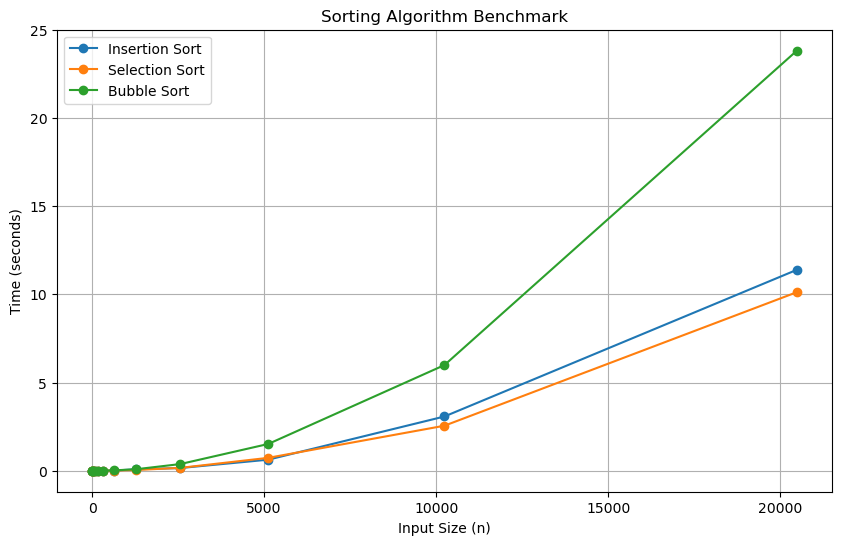

In [4]:
# Plotting the benchmark results
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, insertion_times, label='Insertion Sort', marker='o')
plt.plot(input_sizes, selection_times, label='Selection Sort', marker='o')
plt.plot(input_sizes, bubble_times, label='Bubble Sort', marker='o')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Benchmark')
plt.legend()
plt.grid(True)
plt.savefig("Various Sorting Algorithm Benchmark.png")
plt.show()



In [5]:
# System specifications
print("System Information:")
print(f"Processor: {platform.processor()}")
print(f"RAM: {psutil.virtual_memory().total / (1024 ** 3):.2f} GB")


System Information:
Processor: Intel64 Family 6 Model 186 Stepping 2, GenuineIntel
RAM: 15.69 GB
